In [1]:
import time
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(columns = ['label', 'time', 'x', 'y', 'rad_pos'])
vs = cv2.VideoCapture("../test_videos/test_4.mp4")
kernel = np.ones((5,5),np.uint8)
first_frame = True
eps = 10

frame_width = int(vs.get(3))
frame_height = int(vs.get(4))
size = (frame_width, frame_height)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = vs.get(cv2.CAP_PROP_FPS)
result = cv2.VideoWriter('labeled.mp4', 
                         fourcc,
                         fps, size)
while True:
	# grab the current frame, then handle if we are using a
	# VideoStream or VideoCapture object
	frame = vs.read()[1]
	if frame is None:
		break

	# frame dimensions
	(H, W) = frame.shape[:2]

	bgr = frame
	hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
	l_range = np.array([40, 40, 40])
	u_range = np.array([70, 255, 255])
	mask = cv2.inRange(hsv, l_range, u_range)
	mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
	contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	label = 0
	for cnt in contours:
		check = 0
		x,y,w,h = cv2.boundingRect(cnt)
		if w*h > 400 and y >= H/4:
			cv2.rectangle(bgr,(x,y),(x+w,y+h),(0,255,0),2)
			check += 1
			curr_time = vs.get(cv2.CAP_PROP_POS_MSEC)
			if first_frame:
				label = 0
				x1 = x/2+w/2
				y1 = y/2+h/2
				df.loc[df.shape[0]] = [label, curr_time/1000, x/2+w/2, y/2+h/2, (x/2+w/2)**2 + (y/2+h/2)**2]
				label += 1
			else:
				if x1 - (x/2+w/2) < eps and y1 - (y/2+h/2) < eps:
					label = 0
				else:
					label = 1
				df.loc[df.shape[0]] = [label, curr_time/1000, x/2+w/2, y/2+h/2, (x/2+w/2)**2 + (y/2+h/2)**2] 
				
	first_frame = False
	# cv2.drawContours(bgr, contours, -1, (255,0,0), 3)
	cv2.imshow('Frame_with_contours', bgr)
	result.write(bgr)
	if check > 2:
		print(curr_time)
	# cv2.imshow('Mask', mask)
	key = cv2.waitKey(1) & 0xFF

	if key == ord("q"):
		break
vs.release()
result.release()
# close all windows
cv2.destroyAllWindows()

In [101]:
df.loc[500:600].head(10)

,label,time,x,y,rad_pos
500,0.0,12.078733,199.5,216.0,86456.25
501,1.0,12.112100,76.0,303.0,97585.00
502,1.0,12.145467,75.0,307.0,99874.00
503,1.0,12.178833,73.0,310.0,101429.00
504,0.0,12.178833,178.0,210.0,75784.00
505,0.0,12.212200,171.0,210.0,73341.00
506,1.0,12.245567,71.0,324.0,110017.00
507,0.0,12.245567,164.5,211.0,71581.25
508,1.0,12.278933,70.5,331.0,114531.25
509,1.0,12.312300,71.5,339.0,120033.25


In [102]:
df0 = df[df.label == 0]
df1 = df[df.label == 1]

<AxesSubplot: xlabel='time'>

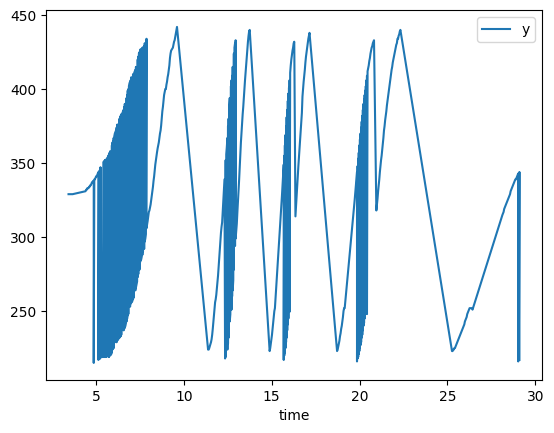

In [105]:
df1.plot('time', 'y')